In [15]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from community import community_louvain
import infomap
import os
from glob import glob

In [20]:
import os
import numpy as np
import mne
import imageio
import h5py
# import scipy.fftpack
import matplotlib
import pywt
from matplotlib.ticker import ScalarFormatter
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
# from scipy import signal
from matplotlib.colors import ListedColormap
import time
import seaborn as sns
# import scipy.io as sio
# from scipy.integrate import simps
import pandas as pd
# from scipy import fft
import matplotlib.mlab as mlab
import sys
import matplotlib as mpl
sys.path.append('T:\EL_experiment\Codes\CCEP_human\Python_Analysis\py_functions')
import NMF_funcs as NMFf

from scipy.stats import norm
import LL_funcs
from scipy.stats import norm
from tkinter import filedialog
from tkinter import *
import ntpath

root = Tk()
root.withdraw()
import math
import scipy
from scipy import signal
import pylab
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform
import platform
from glob import glob
from scipy.io import savemat
import scipy.cluster.hierarchy as spc
from scipy.spatial import distance
from sklearn.cluster import KMeans
import h5py
import basic_func as bf
from scipy.integrate import simps
from numpy import trapz
#import IO_func as IOF
#import BM_func as BMf
import tqdm
from matplotlib.patches import Rectangle
from pathlib import Path
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab
import BM_plots as BMp
import freq_funcs as ff

In [18]:
sub_path  ='X:\\4 e-Lab\\' # y:\\eLab
folder = 'BrainMapping'
cond_folder = 'CR'  # Condition = 'Hour', 'Condition', 'Ph'

In [12]:
path_patient_analysis + '\\' + folder + '/data/Stim_list_*'

'X:\\4 e-Lab\\EvM\\Projects\\EL_experiment\\Analysis\\Patients\\EL011\\BrainMapping/data/Stim_list_*'

In [21]:
subj = "EL011"
path_patient_analysis = os.path.join(sub_path, 'EvM', 'Projects', 'EL_experiment', 'Analysis', 'Patients', subj)

path_gen = os.path.join(sub_path+'\Patients\\' + subj)
if not os.path.exists(path_gen):
    path_gen = 'T:\\EL_experiment\\Patients\\' + subj
path_patient = path_gen + '\Data\EL_experiment'  # os.path.dirname(os.path.dirname(cwd))+'/Patients/'+subj
path_infos = os.path.join(path_gen, 'Electrodes')
# labels
files_list = glob(os.path.join(path_patient_analysis,folder,'data','Stim_list_*'))
i = 0
stimlist_file = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\stimlist_' + cond_folder + '.csv'
stimlist = pd.read_csv(stimlist_file)
lbls = pd.read_excel(os.path.join(path_infos, subj + "_labels.xlsx"), header=0, sheet_name='BP')
if "type" in lbls.columns:
    lbls = lbls[lbls.type=='SEEG']
    lbls = lbls.reset_index(drop=True)
labels_all, labels_region, labels_clinic, coord_all, StimChans, StimChanSM, StimChansC, StimChanIx, stimlist = bf.get_Stim_chans(
    stimlist,
    lbls)
stimlist_sleep = pd.read_csv(os.path.join(path_patient_analysis, 'stimlist_hypnogram.csv'))
file_con = path_patient_analysis + '\\' + folder + '/' + cond_folder + '/data/con_trial_all.csv'
con_trial = pd.read_csv(file_con)
badchans = pd.read_csv(path_patient_analysis + '/BrainMapping/data/badchan.csv')
bad_chans = np.unique(np.array(np.where(badchans.values[:, 1:] == 1))[0, :])

In [23]:
parameters=['Sig', 'd', 'delay']
cluster_method = 'similarity'
file_CC_summ = path_patient_analysis + '\\' + folder + '\\data\\CC_summ_' + cluster_method + '.csv'

CC_summ = pd.read_csv(file_CC_summ)
CC_summ = CC_summ[(CC_summ.sig >0.5)]
CC_summ = CC_summ.groupby(['Stim', 'Chan'], as_index=False)[['t_WOI']].mean()
file_CC_summ = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\summ_general.csv'  # summary_genera
con_summary_all = pd.read_csv(file_CC_summ)

con_summary = con_summary_all[(con_summary_all.Sig > 0)].reset_index(drop=True)
con_summary_short = con_summary[(np.isin(con_summary.Stim, np.unique(con_summary.Chan)))&(np.isin(con_summary.Chan, np.unique(con_summary.Stim)))].reset_index(drop=True)
con_summary_short = con_summary_short.groupby(['Stim', 'Chan'], as_index=False)[parameters].mean().reset_index(drop=True)

h5_file = path_patient_analysis + '\\' + folder + '\\' + cond_folder + '\\data\\EEG_' + cond_folder + '.h5'
if os.path.isfile(h5_file):
    print('loading h5')
    EEG_resp = h5py.File(h5_file)
    EEG_resp = EEG_resp['EEG_resp']
print(EEG_resp.shape)
print(len(stimlist))
print(np.max(con_trial.Num)+1)

con_summary = con_summary_all[(con_summary_all.Sig > 0)].reset_index(drop=True)
con_summary_short = con_summary[(np.isin(con_summary.Stim, np.unique(con_summary.Chan)))&(np.isin(con_summary.Chan, np.unique(con_summary.Stim)))].reset_index(drop=True)
con_summary_short = con_summary_short.groupby(['Stim', 'Chan'], as_index=False)[parameters].mean().reset_index(drop=True)


loading h5
(87, 10344, 2000)
10344
10344


In [41]:
m_cluster = 'Sig'
df_pivot = con_summary[(np.isin(con_summary.Stim, np.unique(con_summary.Chan)))&(np.isin(con_summary.Chan, np.unique(con_summary.Stim)))].groupby(['Stim', 'Chan'], as_index=False)[m_cluster].mean()
nodes_important = np.unique(df_pivot.Stim)
# df_pivot[m_cluster] = 1/df_pivot[m_cluster]
df_pivot = df_pivot.pivot(index='Stim', columns='Chan', values=m_cluster)
df_pivot = df_pivot.fillna(0) 
M = df_pivot.values

In [70]:
con_trial_sig = con_trial[(con_trial.Sig >-1)&(np.isin(con_trial.Stim, np.unique(con_summary.Chan)))&(np.isin(con_trial.Chan, np.unique(con_summary.Stim)))].reset_index(drop=True)
con_trial_sig['LL_sig'] = con_trial_sig['LL']*con_trial_sig['Sig']

In [93]:
df = con_trial_sig.groupby(['Stim', 'Chan', 'Block'], as_index=False)['LL_sig'].mean()
df_pivot = df.set_index(['Stim', 'Chan', 'Block'])['LL_sig'].unstack('Block').fillna(0)
df_pivot = df_pivot.fillna(0)
# Convert to numpy array and reorder axes
M = df_pivot.values.reshape((len(df['Stim'].unique()), len(df['Chan'].unique()), len(df['Block'].unique())))

ValueError: cannot reshape array of size 156630 into shape (49,49,69)

In [99]:
df['Block'].unique()

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25., 26.,
       27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38., 39.,
       40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51., 52.,
       53., 54., 55., 56., 57., 58., 59., 60., 61., 62., 63., 64., 65.,
       66., 67., 68., 69.])

In [100]:
# Create a MultiIndex that has all possible combinations of 'Stim', 'Chan', and 'Time'
multi_index = pd.MultiIndex.from_product([
    df['Stim'].unique(),
    df['Chan'].unique(),
    df['Block'].unique()
], names=['Stim', 'Chan', 'Block'])

In [109]:
df = con_trial_sig.groupby(['Stim', 'Chan', 'Block'], as_index=False)['LL_sig'].mean()
# Create a MultiIndex that has all possible combinations of 'Stim', 'Chan', and 'Time'
multi_index = pd.MultiIndex.from_product([
    np.arange(n_nodes),
    np.arange(n_nodes),
    df['Block'].unique()
], names=['Stim', 'Chan', 'Block'])

# Set the index to ['Stim', 'Chan', 'Time'] and reindex using the full multi_index
df_full = df.set_index(['Stim', 'Chan', 'Block']).reindex(multi_index).fillna(0)

# Pivot to create 3D matrix structure
df_pivot = df_full['LL_sig'].unstack('Block').fillna(0)

# Convert to numpy array and reorder axes
M = df_pivot.values.reshape((n_nodes,n_nodes, len(df['Block'].unique())))


In [46]:
m_cluster = 'Sig'
df_pivot = con_summary[(np.isin(con_summary.Stim, np.unique(con_summary.Chan)))&(np.isin(con_summary.Chan, np.unique(con_summary.Stim)))].groupby(['Stim', 'Chan'], as_index=False)[m_cluster].mean()
df_pivot

,Stim,Chan,Sig
0,0,2,0.866995
1,0,3,0.775610
2,0,4,0.814634
3,0,5,0.887805
4,0,6,0.842365
...,...,...,...
1457,86,53,0.151220
1458,86,73,0.678049
1459,86,74,0.625000
1460,86,75,0.787879


Text(0.5, 1.0, 'BM based on Probability')

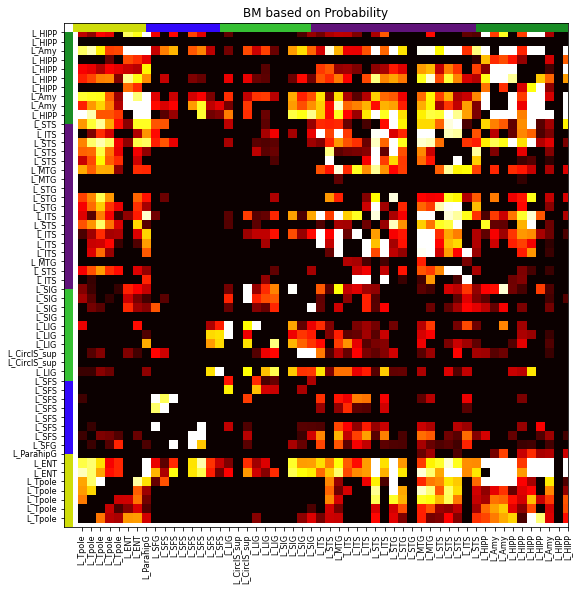

In [114]:
n_node_total = len(labels_all)
M_V = np.zeros((n_node_total, n_node_total))
# Explicitly select the submatrix
rows_idx = nodes_important[:, np.newaxis]
cols_idx = nodes_important

M_V= M[:,:,0]
fig = plt.figure(figsize=(10,10))
axmatrix = fig.add_axes([0.15, 0.15, 0.7, 0.7])
BMp.plot_BM(M_V, labels_all, lbls.Hemisphere.values, axmatrix, axcolor=None, cmap='hot', vlim=None, sort=1)
plt.title('BM based on Probability')

Text(0.5, 1.0, 'BM based on Probability')

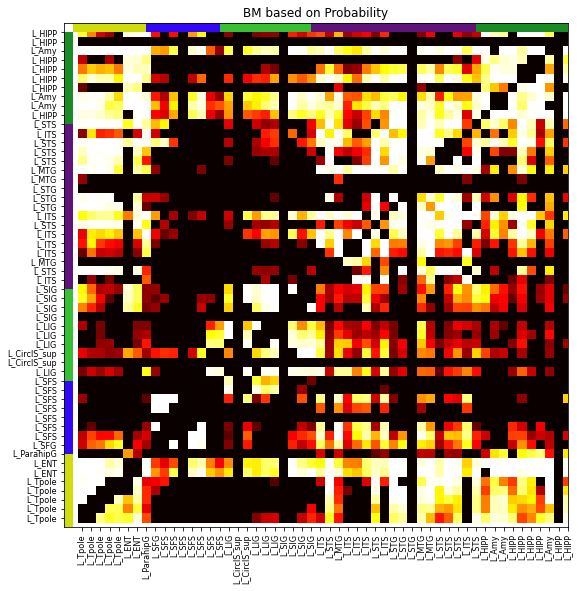

In [43]:
n_node_total = len(labels_all)
M_V = np.zeros((n_node_total, n_node_total))
# Explicitly select the submatrix
rows_idx = nodes_important[:, np.newaxis]
cols_idx = nodes_important

M_V[rows_idx, cols_idx] = V
fig = plt.figure(figsize=(10,10))
axmatrix = fig.add_axes([0.15, 0.15, 0.7, 0.7])
BMp.plot_BM(M_V, labels_all, lbls.Hemisphere.values, axmatrix, axcolor=None, cmap='hot', vlim=None, sort=1)
plt.title('BM based on Probability')

In [125]:
import numpy as np

# Assuming M is your 3D adjacency matrix
num_nodes, _, num_time_steps = M.shape

# Initialize an empty list to store edges
edge_list = []

for t in range(num_time_steps):
    adjacency_matrix = M[:, :, t]
    edges = np.argwhere(adjacency_matrix)
    edge_list.extend([(str(src), str(dst), adjacency_matrix[src, dst]) for src, dst in edges])

# Write the edge list to a file
with open("edge_list.txt", "w") as f:
    for edge in edge_list:
        f.write(f"{edge[0]} {edge[1]} {edge[2]}\n")

In [127]:
from infomap import Infomap, Network

In [129]:
network

<infomap.Network; proxy of <Swig Object of type 'infomap::Network *' at 0x000002A3E92B6240> >

In [133]:
edge_list

[('0', '2', 3.5762056880486672),
 ('0', '3', 1.7224730305519174),
 ('0', '4', 1.5777394184037157),
 ('0', '5', 1.1519849412306276),
 ('0', '6', 3.074921753459121),
 ('0', '7', 3.909686302980493),
 ('0', '9', 3.952211421114228),
 ('0', '13', 2.8621439432078475),
 ('0', '14', 2.454644004543137),
 ('0', '15', 1.910724727809324),
 ('0', '16', 2.1299390694750726),
 ('0', '18', 4.070028472351233),
 ('0', '19', 3.6182884227203385),
 ('0', '20', 2.0513858280655435),
 ('0', '24', 1.205003655516302),
 ('0', '25', 2.378736872224062),
 ('0', '26', 1.1782337043651359),
 ('0', '27', 5.6787005071529855),
 ('0', '28', 7.419898715834125),
 ('0', '29', 0.6208156338571187),
 ('0', '36', 1.0496222965102042),
 ('0', '37', 2.6937754377091103),
 ('0', '38', 2.5166049626538665),
 ('0', '39', 4.465631639781584),
 ('0', '40', 1.979467382162496),
 ('0', '49', 1.0434726713273832),
 ('0', '50', 1.857050683276455),
 ('0', '53', 2.0637439325255955),
 ('0', '54', 1.308258849658078),
 ('0', '75', 1.2107808501545787),


In [132]:
M.shape

(87, 87, 69)

In [134]:
# Create an instance of the Infomap class
infomap = Infomap("--two-level")

# Create a Network object
network = Network()

# Read the edge list from the file into the Network object
network.readInputData(edge_list)

# Run the Infomap algorithm on the Network object
infomap.run(network)

# Get the resulting community structure
tree = infomap.tree

# Print the hierarchy
tree.printTree()

TypeError: Wrong number or type of arguments for overloaded function 'Network_readInputData'.
  Possible C/C++ prototypes are:
    infomap::Network::readInputData(std::string,bool)
    infomap::Network::readInputData(std::string)
    infomap::Network::readInputData()


Found 1 modules with codelength: 5.501814631532063
Result

#node module


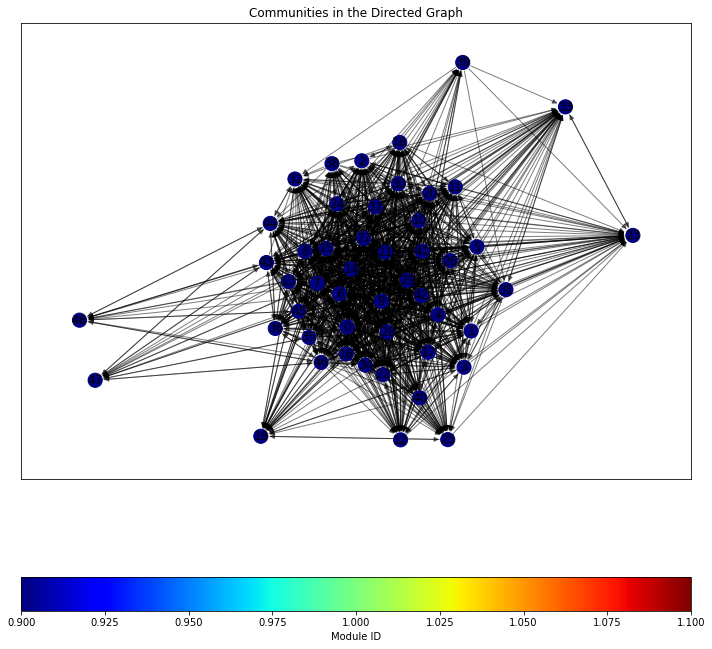

In [44]:
G = nx.DiGraph(M)
# Create a directed graph from the connectivity matrix
G = nx.DiGraph()
rows, cols = np.where(M > 0)  # Non-zero entries in the matrix
edges = zip(rows.tolist(), cols.tolist())
G.add_edges_from(edges)
# Setup and run Infomap
im = infomap.Infomap("--directed")
for e in G.edges(data=True):
    im.add_link(e[0], e[1])
im.run()
# Information
print(f"Found {im.num_top_modules} modules with codelength: {im.codelength}")

print("Result")
print("\n#node module")


# Extract communities
modules = {}
for node in im.tree:
    if node.is_leaf:
        modules[node.node_id] = node.module_id
# Visualization
fig, ax = plt.subplots(figsize=(12, 12))
# Compute a layout for our graph
pos = nx.spring_layout(G)
# Color nodes based on community membership
cmap = plt.get_cmap('jet')
nx.draw_networkx_nodes(G, pos, modules.keys(), node_size=200,
                       cmap=cmap, node_color=list(modules.values()), ax=ax)
# Draw edges
nx.draw_networkx_edges(G, pos, alpha=0.5, ax=ax)
# Draw node labels
nx.draw_networkx_labels(G, pos, ax=ax)
ax.set_title('Communities in the Directed Graph')
# Colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min(modules.values()), vmax=max(modules.values())))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, label='Module ID', orientation='horizontal')
plt.show()